In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 📊 Dataset sobre **Uso de Dispositivos Móviles y Comportamiento del Usuario**

In [ ]:
# ID del archivo
file_id = '14Sd4B2mtU2JOXnu9BEW3uWMkjUN5AlL_'
url = f'https://drive.google.com/uc?id={file_id}'

df = pd.read_csv(url)
df.sample(10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
38,39,OnePlus 9,Android,473,6.4,2312,74,1400,40,Male,4
202,203,Xiaomi Mi 11,Android,88,1.3,327,11,262,22,Male,1
217,218,OnePlus 9,Android,555,9.5,2855,95,1565,24,Male,5
260,261,Xiaomi Mi 11,Android,64,1.3,490,14,151,43,Female,1
79,80,Google Pixel 5,Android,230,5.7,1254,52,989,34,Female,3
115,116,iPhone 12,iOS,121,3.2,651,34,596,39,Male,2
135,136,iPhone 12,iOS,555,11.3,2528,90,1856,55,Female,5
227,228,iPhone 12,iOS,193,5.2,1318,49,626,32,Female,3
208,209,OnePlus 9,Android,539,9.3,2606,92,1990,41,Male,5
69,70,Google Pixel 5,Android,82,1.7,558,16,284,29,Female,1


## 🔍 Información contenida en el dataset
El dataset elegido contiene información sobre el uso de dispositivos móviles y el comportamiento de los usuarios. Las características principales son:

- **ID de usuario**: Identificador único para cada usuario.
- **Modelo del dispositivo**: Modelo del teléfono inteligente del usuario.
- **Sistema operativo**: El sistema operativo del dispositivo (iOS o Android).
- **Tiempo de uso de la aplicación**: Tiempo diario dedicado a aplicaciones móviles, medido en minutos.
- **Tiempo de pantalla encendida**: Promedio de horas por día que la pantalla está activa.
- **Consumo de batería**: Consumo diario de batería en mAh.
- **Número de aplicaciones instaladas**: Total de aplicaciones disponibles en el dispositivo.
- **Uso de datos**: Consumo diario de datos móviles en megabytes.
- **Edad**: Edad del usuario.
- **Género**: Género del usuario (Masculino o Femenino).
- **Clase de comportamiento del usuario**: Clasificación del comportamiento del usuario según patrones de uso (1 a 5).

In [ ]:
# Verificamos información básica
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


El dataset contiene 700 entradas (usuarios) y 11 columnas (variables).



In [ ]:
# Verificamos valores nulos
df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


In [ ]:
# Estadísticas descriptivas
df.describe().T.style.background_gradient(cmap='Blues').format(precision=2)

,count,mean,std,min,25%,50%,75%,max
User ID,700.00,350.50,202.22,1.00,175.75,350.50,525.25,700.00
App Usage Time (min/day),700.00,271.13,177.20,30.00,113.25,227.50,434.25,598.00
Screen On Time (hours/day),700.00,5.27,3.07,1.00,2.50,4.90,7.40,12.00
Battery Drain (mAh/day),700.00,1525.16,819.14,302.00,722.25,1502.50,2229.50,2993.00
Number of Apps Installed,700.00,50.68,26.94,10.00,26.00,49.00,74.00,99.00
Data Usage (MB/day),700.00,929.74,640.45,102.00,373.00,823.50,1341.00,2497.00
Age,700.00,38.48,12.01,18.00,28.00,38.00,49.00,59.00
User Behavior Class,700.00,2.99,1.40,1.00,2.00,3.00,4.00,5.00


La tabla representa un **resumen estadístico de todas las variables numéricas del dataset.** Esta es una forma rápida y visualmente atractiva de entender la distribución y las características básicas de los datos.

> Los colores azules indican la magnitud de los valores: cuanto más oscuro, más alto es el valor.



📌 A destacar:
* **Battery Drain (mAh/day)**: Tiene valores muy altos y mucha variabilidad. Indica diferencias marcadas en el consumo de batería entre usuarios.

* **Data Usage (MB/day)**: También presenta un rango amplio, lo que sugiere diferentes patrones de uso de internet móvil.

* **App Usage Time (min/day) y Screen On Time (hours/day)**: Están relacionados con el comportamiento frente a las pantallas.

## Boxplots para variables numéricas

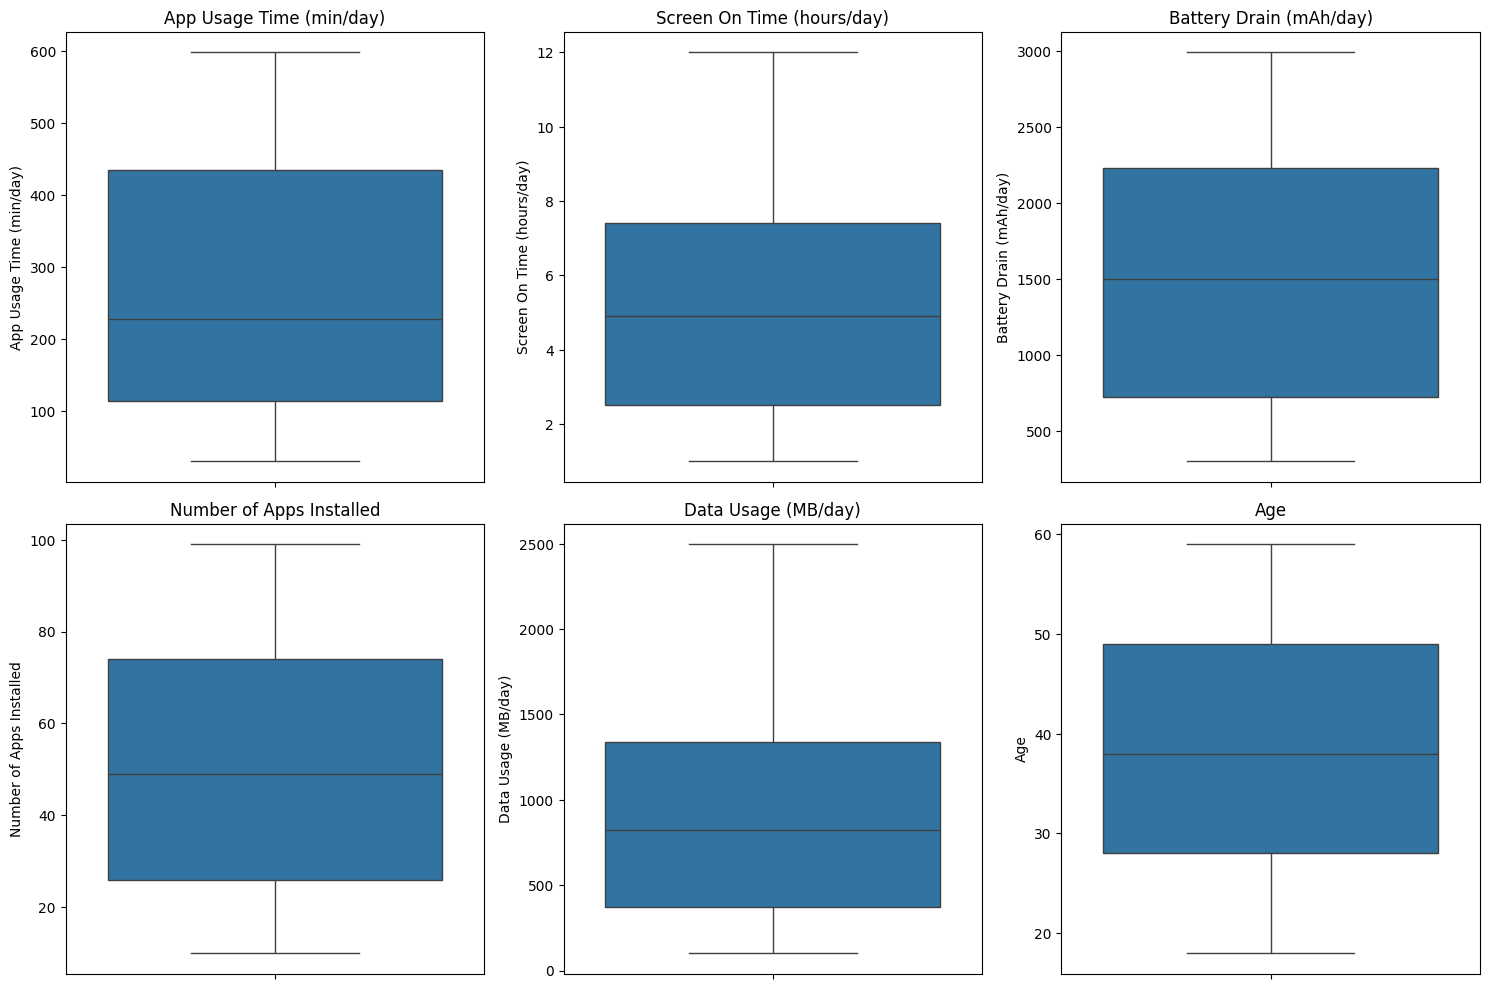


Outliers en App Usage Time (min/day): 0
       App Usage Time (min/day)
count                       0.0
mean                        NaN
std                         NaN
min                         NaN
25%                         NaN
50%                         NaN
75%                         NaN
max                         NaN

Outliers en Screen On Time (hours/day): 0
       Screen On Time (hours/day)
count                         0.0
mean                          NaN
std                           NaN
min                           NaN
25%                           NaN
50%                           NaN
75%                           NaN
max                           NaN

Outliers en Battery Drain (mAh/day): 0
       Battery Drain (mAh/day)
count                      0.0
mean                       NaN
std                        NaN
min                        NaN
25%                        NaN
50%                        NaN
75%                        NaN
max                        NaN

Ou

In [ ]:
numeric_cols = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
                'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Identificación de outliers con el método IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers en {col}: {len(outliers)}")
    print(outliers[[col]].describe())

##**Hallazgos principales**

## Valores nulos
- No hay valores nulos en el dataset.

## Valores atípicos
Existen algunos valores atípicos en casi todas las variables numéricas, especialmente en:

- **App Usage Time (min/day)**
- **Screen On Time (hours/day)**
- **Battery Drain (mAh/day)**
- **Data Usage (MB/day)**

Estos valores extremos podrían representar usuarios con patrones de uso muy intensivos.

## Relaciones entre variables

Fuertes correlaciones positivas entre:

- Tiempo de uso de la aplicación y consumo de batería (**0.92**)
- Tiempo de pantalla encendida y consumo de batería (**0.91**)
- Uso de datos y número de aplicaciones instaladas (**0.82**)

La edad muestra correlaciones débiles con otras variables.

## Distribución por clase de comportamiento

Los usuarios de **clase 5** (comportamiento más intensivo) tienen:

- Mayor tiempo de uso de aplicaciones
- Mayor tiempo de pantalla encendida
- Mayor consumo de batería
- Más aplicaciones instaladas
- Mayor uso de datos móviles
